In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/NYT/NYT_Dataset.csv'




Mounted at /content/drive


In [3]:
articles = pd.read_csv(file_path)
articles = articles[['title','topic','abstract','keywords']]
articles = articles.sample(n=50000, random_state=26).reset_index()

In [4]:
display(articles)

,index,title,topic,abstract,keywords
0,36036,Inquiry on C.I.A. Detentions to Be Unveiled,Foreign,"A United Nations investigator, whose report on...","['United Nations', 'Central Intelligence Agenc..."
1,61202,"Tony Abbott, Ousted Australian Leader, Urges E...",Foreign,"In a speech in London, Mr. Abbott offered Aust...","['Abbott, Tony', 'Immigration and Emigration',..."
2,101496,U.K. Says It Can’t Guarantee Assistance for Ci...,Foreign,Britain’s stance on the case of Nazanin Zaghar...,"['Zaghari-Ratcliffe, Nazanin', 'Iran', 'Great ..."
3,77121,"Sumiteru Taniguchi, 88, Who Survived Nagasaki ...",Foreign,Painfully wounded in the atomic bombing when h...,"['Taniguchi, Sumiteru (1929-2017)', 'Deaths (O..."
4,51808,Agreement in Northern Ireland Averts Collapse ...,Foreign,The deal addressed an austerity budget dispute...,"['Northern Ireland', 'Dalby, Douglas', 'Great ..."
...,...,...,...,...,...
49995,65418,"New Ad Promotes John Kasich, and It Makes Him ...",Politics,"The ad, from a “super PAC” backing Mr. Kasich,...","['Political Advertising', 'Presidential Electi..."
49996,88107,Store’s Bid to Shame Customers Over Plastic Ba...,Foreign,A Vancouver store introduced plastic bags with...,"['Plastic Bags', 'Supermarkets and Grocery Sto..."
49997,32665,A Melting Greenland Weighs Perils Against Pote...,Foreign,As warming temperatures are upending tradition...,"['Metals and Minerals', 'Global Warming', 'Fis..."
49998,18681,"Remembering Rabin, Some See His Legacy Fading",Foreign,"Fifteen years after his assassination, Prime M...","['Rabin, Yitzhak', 'Assassinations and Attempt..."


In [5]:
import re
# get NLTK libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

def clean_text(text, remove_stopwords = False):
    # Simple text break
    # data cleaning

    text = re.sub("(\\t)", ' ', str(text)).lower() #remove escape charecters
    text = re.sub("(\\r)", ' ', str(text)).lower()
    text = re.sub("(\\n)", ' ', str(text)).lower()

    text = re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text = re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text = re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text = re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text = re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively

    text = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!

    text = re.sub("(mailto:)", ' ', str(text)).lower() #remove mailto:
    text = re.sub(r"(\\x9\d)", ' ', str(text)).lower() #remove \x9* in text
    text = re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(text)).lower() #replace INC nums to INC_NUM
    text = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(text)).lower() #replace CM# and CHG# to CM_NUM


    text = re.sub("(\.\s+)", ' ', str(text)).lower() #remove full stop at end of words(not between)
    text = re.sub("(\-\s+)", ' ', str(text)).lower() #remove - at end of words(not between)
    text = re.sub("(\:\s+)", ' ', str(text)).lower() #remove : at end of words(not between)

    text = re.sub("(\s+.\s+)", ' ', str(text)).lower() #remove any single charecters hanging between 2 spaces
    text = re.sub("(\s+)",' ',str(text)).lower() #remove multiple spaces

    #Sho uld always be last
    text = re.sub("(\s+.\s+)", ' ', str(text)).lower() #remove any single charecters hanging between 2 spaces

    # tokenization
    text = text.lower()
#     text = nltk.word_tokenize(text) # converts review to tokens
    return text

In [6]:
from tqdm.notebook import tqdm
tqdm.pandas()
from tqdm.notebook import tqdm
tqdm.pandas()
articles['Cleaned_abstract'] = articles['abstract'].progress_apply(clean_text)
articles['Cleaned_title'] = articles['title'].progress_apply(clean_text)
articles['Cleaned_keywords'] = articles['keywords'].progress_apply(clean_text)
articles['Cleaned_topic'] = articles['topic'].progress_apply(clean_text)
# Assuming 'keywords' and 'topic' are columns in your DataFrame `articles`




  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

In [7]:
max_abstract_length = 35
max_title_length = 15
max_keywords_length=10
max_topic_length=1
max_combined_text_length=max_abstract_length+max_keywords_length+max_topic_length

In [8]:
display(articles['Cleaned_abstract'])

0        a united nations investigator whose report on ...
1        in speech in london mr abbott offered australi...
2        britain’s stance on the case of nazanin zaghar...
3        painfully wounded in the atomic bombing when h...
4        the deal addressed an austerity budget dispute...
                               ...                        
49995    the ad from “super pac” backing mr kasich show...
49996    a vancouver store introduced plastic bags with...
49997    as warming temperatures are upending tradition...
49998    fifteen years after his assassination prime mi...
49999    a german court ruled that carles puigdemont co...
Name: Cleaned_abstract, Length: 50000, dtype: object

In [9]:
display(articles['Cleaned_title'])

0               inquiry on c.i.a detentions to be unveiled
1        tony abbott ousted australian leader urges eur...
2        u.k says it can’t guarantee assistance for cit...
3        sumiteru taniguchi 88 who survived nagasaki to...
4        agreement in northern ireland averts collapse ...
                               ...                        
49995    new ad promotes john kasich and it makes him u...
49996    store’s bid to shame customers over plastic ba...
49997    a melting greenland weighs perils against pote...
49998         remembering rabin some see his legacy fading
49999    ex-catalonia leader can be extradited but not ...
Name: Cleaned_title, Length: 50000, dtype: object

In [10]:
from time import time
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
abstracts = [str(doc) for doc in nlp.pipe(articles['Cleaned_abstract'], batch_size=5000)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 1.74 mins


In [11]:
abstracts[0]

'a united nations investigator whose report on the c.i.a.’s use of secret detentions and interrogation techniques is to be released called on the united states to publicly account for the policy.'

In [12]:
t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
title = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(articles['Cleaned_title'], batch_size=5000)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.64 mins


In [13]:
title[0]


'_START_ inquiry on c.i.a detentions to be unveiled _END_'

articles['Cleaned_abstract'] = pd.Series(abstracts)
articles['Cleaned_title'] = pd.Series(title)
articles['Cleaned_keywords'] = pd.Series(keywords)
articles['Cleaned_topic'] = pd.Series(topic)

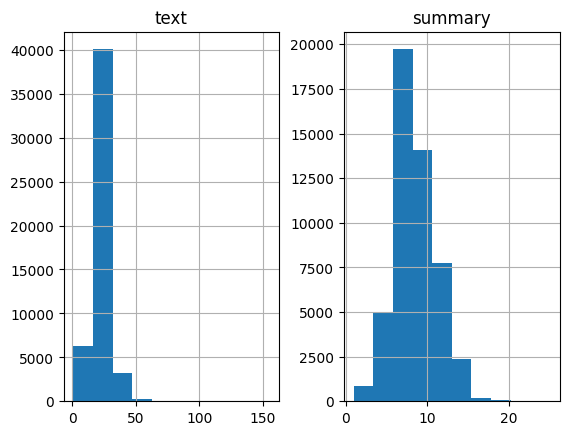

In [14]:
import matplotlib.pyplot as plt

abstract_count = []
title_count = []

for sent in articles['Cleaned_abstract']:
    abstract_count.append(len(sent.split()))
for sent in articles['Cleaned_title']:
    title_count.append(len(sent.split()))

graph_df = pd.DataFrame()
graph_df['text'] = abstract_count
graph_df['summary'] = title_count


graph_df.hist(bins = 10)
plt.show()

In [15]:
articles['Clean_length'] = articles['Cleaned_abstract'].progress_apply(lambda x: len(x.split()))
min_len = np.min(articles['Clean_length'])
max_len = np.max(articles['Clean_length'])
avg_len = np.mean(articles['Clean_length'])
std_len = np.sqrt(np.var(articles['Clean_length']))
med_len = np.median(articles['Clean_length'])

print("Shortest Abstract", min_len)
print("Longest Abstract", max_len)
print("Median Abstract", med_len)
print("Average Abstract", avg_len)
print("Standard deviation", std_len)
print(f"Percent articles under average or {avg_len} words:", articles[articles['Clean_length'] <= (avg_len)]['Clean_length'].count()/len(articles['Clean_length']))
print(f"Percent articles under 0.5 stds or {avg_len + 0.5*std_len} words:", articles[articles['Clean_length'] <= (avg_len + 0.5*std_len)]['Clean_length'].count()/len(articles['Clean_length']))
print(f"Percent articles under 1 std or {avg_len + std_len} words:", articles[articles['Clean_length'] <= (avg_len + std_len)]['Clean_length'].count()/len(articles['Clean_length']))
print(f"Percent articles under 2 stds or {avg_len + 2*std_len} words:", articles[articles['Clean_length'] <= (avg_len + 2*std_len)]['Clean_length'].count()/len(articles['Clean_length']))

  0%|          | 0/50000 [00:00<?, ?it/s]

Shortest Abstract 1
Longest Abstract 155
Median Abstract 23.0
Average Abstract 23.41556
Standard deviation 7.121937228479341
Percent articles under average or 23.41556 words: 0.5069
Percent articles under 0.5 stds or 26.97652861423967 words: 0.7293
Percent articles under 1 std or 30.53749722847934 words: 0.90486
Percent articles under 2 stds or 37.65943445695868 words: 0.97734


In [16]:
articles['Clean_title_length'] = articles['Cleaned_title'].progress_apply(lambda x: len(x.split()))
min_len = np.min(articles['Clean_title_length'])
max_len = np.max(articles['Clean_title_length'])
avg_len = np.mean(articles['Clean_title_length'])
std_len = np.sqrt(np.var(articles['Clean_title_length']))
med_len = np.median(articles['Clean_title_length'])

print("Shortest title", min_len)
print("Longest title", max_len)
print("Median title", med_len)
print("Average title", avg_len)
print("Standard deviation", std_len)
print(f"Percent titles under average or {avg_len} words:", articles[articles['Clean_title_length'] <= (avg_len)]['Clean_title_length'].count()/len(articles['Clean_title_length']))
print(f"Percent titles under 0.5 stds or {avg_len + 0.5*std_len} words:", articles[articles['Clean_title_length'] <= (avg_len + 0.5*std_len)]['Clean_title_length'].count()/len(articles['Clean_title_length']))
print(f"Percent titles under 1 std or {avg_len + std_len} words:", articles[articles['Clean_title_length'] <= (avg_len + std_len)]['Clean_title_length'].count()/len(articles['Clean_title_length']))
print(f"Percent titles under 2 stds or {avg_len + 2*std_len} words:", articles[articles['Clean_title_length'] <= (avg_len + 2*std_len)]['Clean_title_length'].count()/len(articles['Clean_title_length']))

  0%|          | 0/50000 [00:00<?, ?it/s]

Shortest title 1
Longest title 25
Median title 8.0
Average title 8.48706
Standard deviation 2.4982939291444475
Percent titles under average or 8.48706 words: 0.51114
Percent titles under 0.5 stds or 9.736206964572224 words: 0.6609
Percent titles under 1 std or 10.985353929144447 words: 0.7928
Percent titles under 2 stds or 13.483647858288894 words: 0.97798


In [17]:
#Select the Summaries and Text between max len defined above

cleaned_abstracts = np.array(articles['Cleaned_abstract'])
cleaned_titles = np.array(articles['Cleaned_title'])
cleaned_topic = np.array(articles['Cleaned_topic'])
cleaned_keywords = np.array(articles['Cleaned_keywords'])

shortened_abstract=[]
shortened_keywords=[]
shortened_topic=[]
shortened_titles=[]

for i in range(len(cleaned_abstracts)):
    if(len(cleaned_abstracts[i].split())<=max_abstract_length and len(cleaned_titles[i].split())<=max_title_length) and len(cleaned_topic[i].split())<=max_topic_length and len(cleaned_keywords[i].split())<=max_keywords_length:
        shortened_abstract.append(cleaned_abstracts[i])
        shortened_titles.append(cleaned_titles[i])
        shortened_keywords.append(cleaned_keywords[i])
        shortened_topic.append(cleaned_topic[i])

processed_articles=pd.DataFrame({'Abstract':shortened_abstract,'Title':shortened_titles,'Topic':shortened_topic,'Keywords':shortened_keywords})
display(processed_articles.head(2))
processed_articles['Title'] = processed_articles['Title'].progress_apply(lambda x : 'sostok '+ x + ' eostok')
display(processed_articles.head(2))

,Abstract,Title,Topic,Keywords
0,young afghans are abandoning their country fru...,running out of options afghans pay for an exit,foreign,human trafficking smuggling asylum political ...
1,the senior u.n official for humanitarian relie...,u.n official condemns gaza blockade,foreign,hamas humanitarian aid egypt united nations i...


  0%|          | 0/17698 [00:00<?, ?it/s]

,Abstract,Title,Topic,Keywords
0,young afghans are abandoning their country fru...,sostok running out of options afghans pay for ...,foreign,human trafficking smuggling asylum political ...
1,the senior u.n official for humanitarian relie...,sostok u.n official condemns gaza blockade eostok,foreign,hamas humanitarian aid egypt united nations i...


In [18]:
processed_articles['Combined_text'] = processed_articles['Abstract'] + ' ' + processed_articles['Keywords'] + ' ' + processed_articles['Topic']


In [19]:
from sklearn.model_selection import train_test_split
# Splitting only abstracts and titles
x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(processed_articles['Combined_text']),  # Abstract sequences
    np.array(processed_articles['Title']),     # Title sequences
    test_size=0.1,
    random_state=26,
    shuffle=True
)


In [20]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))


In [21]:
thresh=2

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 42.37275421026968
Total Coverage of rare words: 2.386787629353875


In [22]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr)
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_combined_text_length, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_combined_text_length, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 15365


In [23]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

In [24]:
thresh=2

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 50.36534790336383
Total Coverage of rare words: 4.95489369418378


In [25]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr)
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val)

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_title_length, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_title_length, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 7541


In [26]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [27]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [28]:
from keras import backend as K
import gensim
from numpy import *
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")



K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_combined_text_length,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 46)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 46, 200)              3073000   ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 46, 300),            601200    ['embedding[0][0]']           
                              (None, 300),                                                        
                              (None, 300)]                                                        
                                                                                              

In [29]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [30]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [31]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
125/125 [==============================] - 110s 740ms/step - loss: 4.6700 - val_loss: 3.9804
Epoch 2/50
125/125 [==============================] - 82s 658ms/step - loss: 3.9707 - val_loss: 3.7630
Epoch 3/50
125/125 [==============================] - 76s 607ms/step - loss: 3.8753 - val_loss: 3.7258
Epoch 4/50
125/125 [==============================] - 75s 598ms/step - loss: 3.8090 - val_loss: 3.6402
Epoch 5/50
125/125 [==============================] - 76s 611ms/step - loss: 3.7453 - val_loss: 3.5913
Epoch 6/50
125/125 [==============================] - 73s 585ms/step - loss: 3.7022 - val_loss: 3.5964
Epoch 7/50
125/125 [==============================] - 74s 593ms/step - loss: 3.6691 - val_loss: 3.5374
Epoch 8/50
125/125 [==============================] - 76s 603ms/step - loss: 3.6401 - val_loss: 3.5140
Epoch 9/50
125/125 [==============================] - 77s 613ms/step - loss: 3.6116 - val_loss: 3.4921
Epoch 10/50
125/125 [==============================] - 74s 592ms/step - 

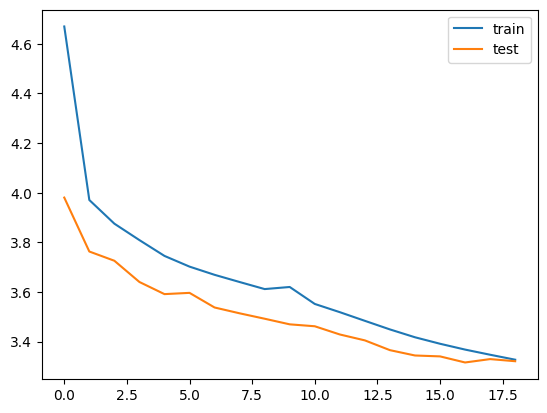

In [32]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [33]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [34]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_abstract_length,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [35]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_title_length-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [36]:
def seq2title(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2abstract(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [40]:
for i in range(0, 100):
    abstract_length = x_tr[i].shape[0]
    if abstract_length > max_abstract_length:
        # Truncate the abstract if it's longer than expected
        reshaped_input = x_tr[i][:max_abstract_length].reshape(1, max_abstract_length)
    elif abstract_length < max_abstract_length:
        # Pad the abstract with zeros if it's shorter than expected
        padding = np.zeros(max_abstract_length - abstract_length, dtype=x_tr[i].dtype)
        reshaped_input = np.concatenate([x_tr[i], padding]).reshape(1, max_abstract_length)
    else:
        # Reshape the abstract as is if it matches the expected length
        reshaped_input = x_tr[i].reshape(1, max_abstract_length)

    print("Abstract:", seq2abstract(x_tr[i]))
    print("Original Title:", seq2title(y_tr[i]))
    print("Predicted Title:", decode_sequence(reshaped_input))
    print("\n")


Abstract: dr abdullah the second most senior intelligence officer in afghanistan was killed by suicide bomb outside the main mosque in his hometown afghanistan taliban foreign 
Original Title: afghan intelligence officer killed 
1/1 [==============================] - 0s 24ms/step
Predicted Title:  north korea in pakistan


Abstract: two palestinians were killed and several others were wounded as residents said that up to 000 troops entered the camp between jerusalem and ramallah palestinians israel rami west bank danny 1990 2015 foreign 
Original Title: israeli soldiers raid west bank refugee camp prompting deadly clashes 
1/1 [==============================] - 0s 23ms/step
Predicted Title:  north korea in pakistan


Abstract: footage released by firefighters shows aerial images of warehouse in tianjin china the site of huge explosions on aug 12 explosions accidental tianjin china foreign 
Original Title: drone footage of blast aftermath 
1/1 [==============================] - 0s 23ms/

In [42]:
import pandas as pd
import numpy as np

# List to store each row of data
outputs = []
print(len(x_tr))  # This confirms the number of entries you're working with

# Loop over the data
for i in range(0, 100):
    abstract = seq2abstract(x_tr[i])
    true_title = seq2title(y_tr[i])

    # Handle potential reshaping issues
    abstract_length = x_tr[i].shape[0]
    if abstract_length > max_abstract_length:
        reshaped_input = x_tr[i][:max_abstract_length].reshape(1, max_abstract_length)
    elif abstract_length < max_abstract_length:
        padding = np.zeros(max_abstract_length - abstract_length, dtype=x_tr[i].dtype)
        reshaped_input = np.concatenate([x_tr[i], padding]).reshape(1, max_abstract_length)
    else:
        reshaped_input = x_tr[i].reshape(1, max_abstract_length)

    predicted_title = decode_sequence(reshaped_input)

    # Append a dictionary for each iteration to collect data
    outputs.append({
        "Model": "Keywords+LSTM",
        "Abstract": abstract,
        "True Title": true_title,
        "Predicted Title": predicted_title
    })

# Optionally, convert to DataFrame for easier viewing/manipulation
df_outputs = pd.DataFrame(outputs)
print("Data collection complete.")
# Print first few rows to check
print(df_outputs.head())


15896
1/1 [==============================] - 0s 23ms/step
Data collection complete.
           Model  \
0  Keywords+LSTM   
1  Keywords+LSTM   
2  Keywords+LSTM   
3  Keywords+LSTM   
4  Keywords+LSTM   

                                                                                                                                                                                                  Abstract  \
0                                   dr abdullah the second most senior intelligence officer in afghanistan was killed by suicide bomb outside the main mosque in his hometown afghanistan taliban foreign    
1  two palestinians were killed and several others were wounded as residents said that up to 000 troops entered the camp between jerusalem and ramallah palestinians israel rami west bank danny 1990 2...   
2                                    footage released by firefighters shows aerial images of warehouse in tianjin china the site of huge explosions on aug 12 explosions accident

In [44]:


# Convert to DataFrame
df_outputs = pd.DataFrame(outputs)

# Save to CSV
file_path = '/content/drive/My Drive/NYT/'
csv_file_name = 'keywords_output1-100.csv'
csv_path=file_path + csv_file_name

df_outputs.to_csv(csv_path, index=False)
print(f"Data saved to {csv_path}.")


Data saved to /content/drive/My Drive/NYT/keywords_output1-100.csv.
